In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 15.3MB/s 
     |████████████████████████████████| 1.2MB 51.9MB/s 
     |████████████████████████████████| 194kB 53.3MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

In [18]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.180101,0.207032,0.059540,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.060698,0.090895,0.036536,00:53


### Sidebar: This Book Was Written in Jupyter Notebooks

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [19]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
#uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])#

In [20]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999999


### What Is Machine Learning?

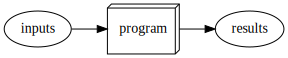

In [22]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

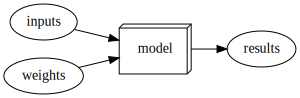

In [23]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

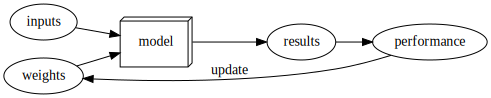

In [24]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

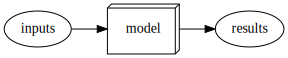

In [25]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

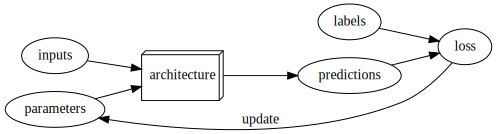

In [21]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

## Deep Learning Is Not Just for Image Classification

In [7]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,3.484761,2.840193,00:01


epoch,train_loss,valid_loss,time
0,2.003857,2.159832,00:01
1,1.744359,2.753011,00:01
2,1.562726,1.616677,00:01
3,1.402018,1.469394,00:01
4,1.261028,1.391007,00:01
5,1.139290,1.372302,00:01
6,1.037183,1.286494,00:01
7,0.956006,1.323755,00:01


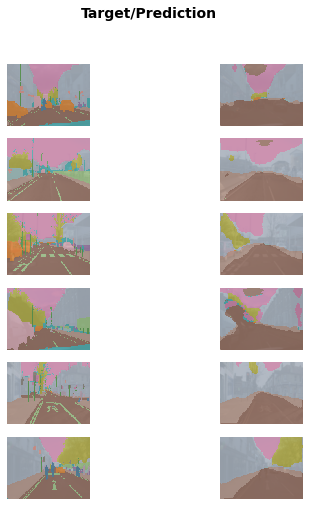

In [8]:
learn.show_results(max_n=6, figsize=(7,8))

In [9]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.462328,0.413737,0.815800,03:49


epoch,train_loss,valid_loss,accuracy,time
0,0.308946,0.249034,0.896280,07:22
1,0.246223,0.202702,0.922520,07:23
2,0.177745,0.191935,0.927680,07:24
3,0.143667,0.194414,0.929000,07:24


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [10]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0058, 0.9942]))

### Sidebar: The Order Matters

### End sidebar

In [3]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [4]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.361275,0.365533,0.835227,00:04
1,0.348757,0.350311,0.840295,00:04
2,0.344826,0.348132,0.838759,00:04


In [5]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497563,1.419108,00:00


epoch,train_loss,valid_loss,time
0,1.348368,1.360463,00:00
1,1.248621,1.178440,00:00
2,1.010771,0.876555,00:00
3,0.791824,0.746206,00:00
4,0.690008,0.717330,00:00
5,0.641033,0.709639,00:00
6,0.629534,0.706519,00:00
7,0.610997,0.704522,00:00
8,0.603987,0.703974,00:00
9,0.603293,0.703902,00:00


In [6]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,44.0,72.0,5.0,3.459052
1,13.0,51.0,4.0,4.119844
2,62.0,65.0,4.0,3.665025
3,40.0,53.0,5.0,3.804961
4,19.0,16.0,4.5,4.498744
5,15.0,5.0,4.5,3.444189
6,83.0,10.0,2.0,2.451942
7,55.0,14.0,5.0,4.391811
8,63.0,26.0,3.0,2.967124
